# **Realizado por:**
* Angélica Corrales - A00367954
* Keren López - A00368902

In [139]:
# Based on : https://www.cienciadedatos.net/documentos/py19-pca-python.html
# ==============================================================================

import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import multiprocessing

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [140]:
df_train = pd.read_csv('https://raw.githubusercontent.com/KerenLopez/Datasets-from-Kaggle/main/house-prices-advanced-regression-techniques.csv')

In [141]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [142]:
df_train.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


In [143]:
df_copy = df_train.copy()
non_numeric = df_copy.select_dtypes(include=['object'])
df_copy = df_copy.drop(columns=non_numeric)
df_copy.shape

(1460, 38)

In [144]:
df_copy.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [145]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [146]:
df_copy.duplicated().sum()

0

In [147]:
nan = df_copy.isna().sum()
print(nan)

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64


In [148]:
#Porcentaje que representa la cantidad de valores nulos encontrados
for i in range(nan.shape[0]):
    print('El porcentaje de valores nulos en {} es :{:.2f}'.format(df_copy.columns[i],100*(nan[i]/df_copy.shape[0])))

El porcentaje de valores nulos en Id es :0.00
El porcentaje de valores nulos en MSSubClass es :0.00
El porcentaje de valores nulos en LotFrontage es :17.74
El porcentaje de valores nulos en LotArea es :0.00
El porcentaje de valores nulos en OverallQual es :0.00
El porcentaje de valores nulos en OverallCond es :0.00
El porcentaje de valores nulos en YearBuilt es :0.00
El porcentaje de valores nulos en YearRemodAdd es :0.00
El porcentaje de valores nulos en MasVnrArea es :0.55
El porcentaje de valores nulos en BsmtFinSF1 es :0.00
El porcentaje de valores nulos en BsmtFinSF2 es :0.00
El porcentaje de valores nulos en BsmtUnfSF es :0.00
El porcentaje de valores nulos en TotalBsmtSF es :0.00
El porcentaje de valores nulos en 1stFlrSF es :0.00
El porcentaje de valores nulos en 2ndFlrSF es :0.00
El porcentaje de valores nulos en LowQualFinSF es :0.00
El porcentaje de valores nulos en GrLivArea es :0.00
El porcentaje de valores nulos en BsmtFullBath es :0.00
El porcentaje de valores nulos en B

In [149]:
#Eliminación de valores nulos de la columna GarageYrBlt, ya que representan un porcentaje menor al 10%
df_copy=df_copy.dropna(subset=['GarageYrBlt'])

In [150]:
#Eliminación de valores nulos de la columna MasVnrArea, ya que representan un porcentaje menor al 10%
df_copy=df_copy.dropna(subset=['MasVnrArea'])

In [151]:
# Promedio/media de la columna LotFrontage
avg_LotFrontage = df_copy["LotFrontage"].astype("float").mean()
# Reemplazo de NaN por la media, columna LotFrontage
df_copy["LotFrontage"].replace(np.nan, avg_LotFrontage, inplace=True)
nan = df_copy.isna().sum()
print(nan)

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64


In [152]:
#Eliminación de columnas categóricas codificadas y fechas (años/meses)
df_copy=df_copy.drop(columns=['Id', 'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold'])
df_copy.shape

(1371, 29)

In [153]:
#Revisar valores 0 en cada columna y eliminar columnas cuyos porcentajes de correspondientes a valores 0 son mayores al 50%

for atributo_de_interes in df_copy.columns:
    count = (df_copy[atributo_de_interes] == 0).sum()
    percentage = 100*count/(len(df_copy.index))
    print('Atributo: ' + atributo_de_interes)
    print("Número de valores 0: ", count)
    print("Porcentaje de valores cero: %.2f" % percentage)
    if percentage >50:
        df_copy = df_copy.drop(columns=[atributo_de_interes])
        n_rows, n_cols = df_copy.shape
        print('ELIMINADA!!')
    print("\n")

Atributo: LotFrontage
Número de valores 0:  0
Porcentaje de valores cero: 0.00


Atributo: LotArea
Número de valores 0:  0
Porcentaje de valores cero: 0.00


Atributo: MasVnrArea
Número de valores 0:  786
Porcentaje de valores cero: 57.33
ELIMINADA!!


Atributo: BsmtFinSF1
Número de valores 0:  424
Porcentaje de valores cero: 30.93


Atributo: BsmtFinSF2
Número de valores 0:  1208
Porcentaje de valores cero: 88.11
ELIMINADA!!


Atributo: BsmtUnfSF
Número de valores 0:  103
Porcentaje de valores cero: 7.51


Atributo: TotalBsmtSF
Número de valores 0:  30
Porcentaje de valores cero: 2.19


Atributo: 1stFlrSF
Número de valores 0:  0
Porcentaje de valores cero: 0.00


Atributo: 2ndFlrSF
Número de valores 0:  772
Porcentaje de valores cero: 56.31
ELIMINADA!!


Atributo: LowQualFinSF
Número de valores 0:  1352
Porcentaje de valores cero: 98.61
ELIMINADA!!


Atributo: GrLivArea
Número de valores 0:  0
Porcentaje de valores cero: 0.00


Atributo: BsmtFullBath
Número de valores 0:  796
Porcenta

In [154]:
df_copy.shape

(1371, 16)

In [155]:
# Se van a cambiar los valores cero por los valores de la media para el atributo en particular,

n_rows, n_cols = df_copy.shape

for i in range(n_cols-1):
    atributo_de_interes = df_copy.columns[i]
    print("Mediana de atributo " + atributo_de_interes + " = %.2f" % np.median(df_copy[atributo_de_interes]))
    df_copy = df_copy.replace({atributo_de_interes:0}, np.median(df_copy[atributo_de_interes]))
    print('\n')

df_copy.head()    

Mediana de atributo LotFrontage = 70.67


Mediana de atributo LotArea = 9591.00


Mediana de atributo BsmtFinSF1 = 399.00


Mediana de atributo BsmtUnfSF = 476.00


Mediana de atributo TotalBsmtSF = 1008.00


Mediana de atributo 1stFlrSF = 1098.00


Mediana de atributo GrLivArea = 1479.00


Mediana de atributo FullBath = 2.00


Mediana de atributo BedroomAbvGr = 3.00


Mediana de atributo KitchenAbvGr = 1.00


Mediana de atributo TotRmsAbvGrd = 6.00


Mediana de atributo Fireplaces = 1.00


Mediana de atributo GarageCars = 2.00


Mediana de atributo GarageArea = 484.00


Mediana de atributo OpenPorchSF = 27.00




,LotFrontage,LotArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,OpenPorchSF,SalePrice
0,65.0,8450,706,150,856,856,1710,2,3,1,8,1,2,548,61,208500
1,80.0,9600,978,284,1262,1262,1262,2,3,1,6,1,2,460,27,181500
2,68.0,11250,486,434,920,920,1786,2,3,1,6,1,2,608,42,223500
3,60.0,9550,216,540,756,961,1717,1,3,1,7,1,3,642,35,140000
4,84.0,14260,655,490,1145,1145,2198,2,4,1,9,1,3,836,84,250000


In [157]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
df_copy.mean(axis=0)

----------------------
Media de cada variable
----------------------


LotFrontage         70.665477
LotArea          10686.740336
BsmtFinSF1         577.276441
BsmtUnfSF          606.366885
TotalBsmtSF       1094.926331
1stFlrSF          1175.778264
GrLivArea         1533.348651
FullBath             1.589351
BedroomAbvGr         2.878920
KitchenAbvGr         1.037929
TotRmsAbvGrd         6.552152
Fireplaces           1.088986
GarageCars           1.869438
GarageArea         500.389497
OpenPorchSF         58.790664
SalePrice       185181.890591
dtype: float64

In [158]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
df_copy.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


LotFrontage     4.814187e+02
LotArea         1.045467e+08
BsmtFinSF1      1.326020e+05
BsmtUnfSF       1.719772e+05
TotalBsmtSF     1.643195e+05
1stFlrSF        1.485406e+05
GrLivArea       2.696862e+05
FullBath        2.859887e-01
BedroomAbvGr    5.765699e-01
KitchenAbvGr    3.797644e-02
TotRmsAbvGrd    2.529213e+00
Fireplaces      8.842605e-02
GarageCars      3.982697e-01
GarageArea      3.457368e+04
OpenPorchSF     3.292823e+03
SalePrice       6.220848e+09
dtype: float64

In [159]:
df_copy2 = df_copy.copy()

# **Aplicación PCA**


Si no se estandarizan las variables para que tengan media cero y desviación estándar de uno antes de realizar el estudio PCA, la variable LotArea, que tiene una media y dispersión muy superior al resto, dominará la mayoría de las componentes principales.

In [160]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe


Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [161]:
pca_pipe.fit(df_copy)
pca_pipe.named_steps


{'standardscaler': StandardScaler(), 'pca': PCA()}

In [162]:
# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [163]:
# Se convierte el array a dataframe para añadir nombres a los ejes.
index_list=[]

for i in range(1,17):
  index_list.append('PC'+str(i))

pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df_copy.columns,
    index = index_list
)

,LotFrontage,LotArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,OpenPorchSF,SalePrice
PC1,0.214856,0.152974,0.195898,0.129498,0.316548,0.329630,0.352828,0.281664,0.161545,0.035682,0.298669,0.116994,0.303808,0.307670,0.149627,0.350713
PC2,0.083094,0.170331,0.466616,-0.277606,0.263697,0.200195,-0.192077,-0.237510,-0.455825,-0.266832,-0.360586,0.212288,-0.000848,0.079455,0.003660,0.077319
PC3,0.177906,0.343713,0.187463,-0.425005,-0.147684,-0.061870,0.174571,-0.113628,0.360870,0.120557,0.233009,0.417426,-0.317819,-0.291358,-0.020374,-0.076175
PC4,0.208118,0.219501,-0.229443,0.577199,0.331708,0.336197,-0.102714,-0.179975,-0.015906,0.174847,-0.076450,0.186482,-0.263953,-0.228856,-0.177380,-0.178182
PC5,-0.075700,-0.155120,0.291671,-0.189876,0.101289,0.109415,-0.099499,0.030351,-0.032819,0.752971,0.002218,-0.123089,0.122910,0.120804,-0.424692,-0.150888
PC6,0.456644,0.326253,-0.096912,-0.040759,-0.147117,-0.123814,-0.076095,-0.087300,0.140510,-0.272160,-0.015655,-0.286201,0.203288,0.205260,-0.603255,0.015925
PC7,0.515590,0.043584,0.066117,-0.074426,0.027180,-0.008026,-0.120144,-0.208550,0.078323,0.219787,-0.052067,-0.452009,-0.044641,0.077576,0.589123,-0.216990
PC8,-0.141516,0.592007,-0.252373,0.050238,-0.210228,-0.222125,-0.128972,0.097469,-0.215552,0.311213,-0.141295,0.283284,0.299236,0.246938,0.210849,-0.071471
PC9,-0.390590,0.532804,0.158662,-0.027283,0.133621,0.100511,0.032383,0.280527,0.006740,-0.040976,-0.010975,-0.562116,-0.218590,-0.246828,0.001868,0.058410
PC10,0.464640,-0.101615,-0.040479,-0.050422,-0.113115,-0.097047,0.029251,0.668174,-0.390911,0.091935,-0.132447,0.050645,-0.155711,-0.286537,-0.046631,0.100915


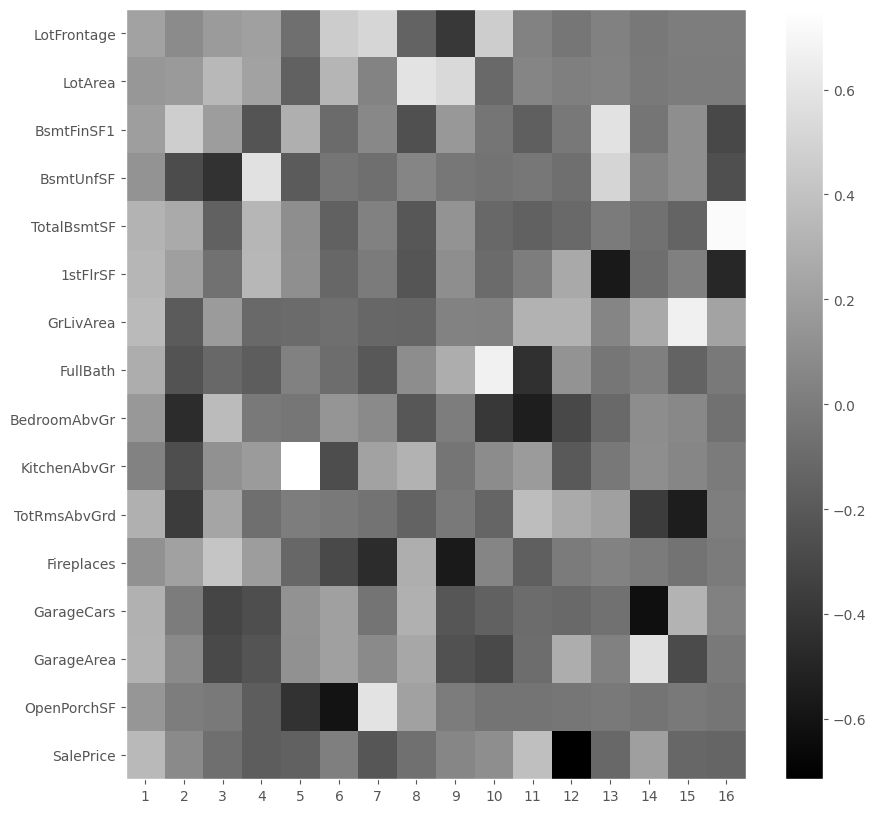

In [164]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='gray', aspect='auto')
plt.yticks(range(len(df_copy.columns)), df_copy.columns)
plt.xticks(range(len(df_copy.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.35543443 0.12093484 0.09381868 0.07143252 0.06525016 0.05596852
 0.05140445 0.04764686 0.04032619 0.02931193 0.02132335 0.01322444
 0.01166782 0.00966415 0.00770405 0.00488759]


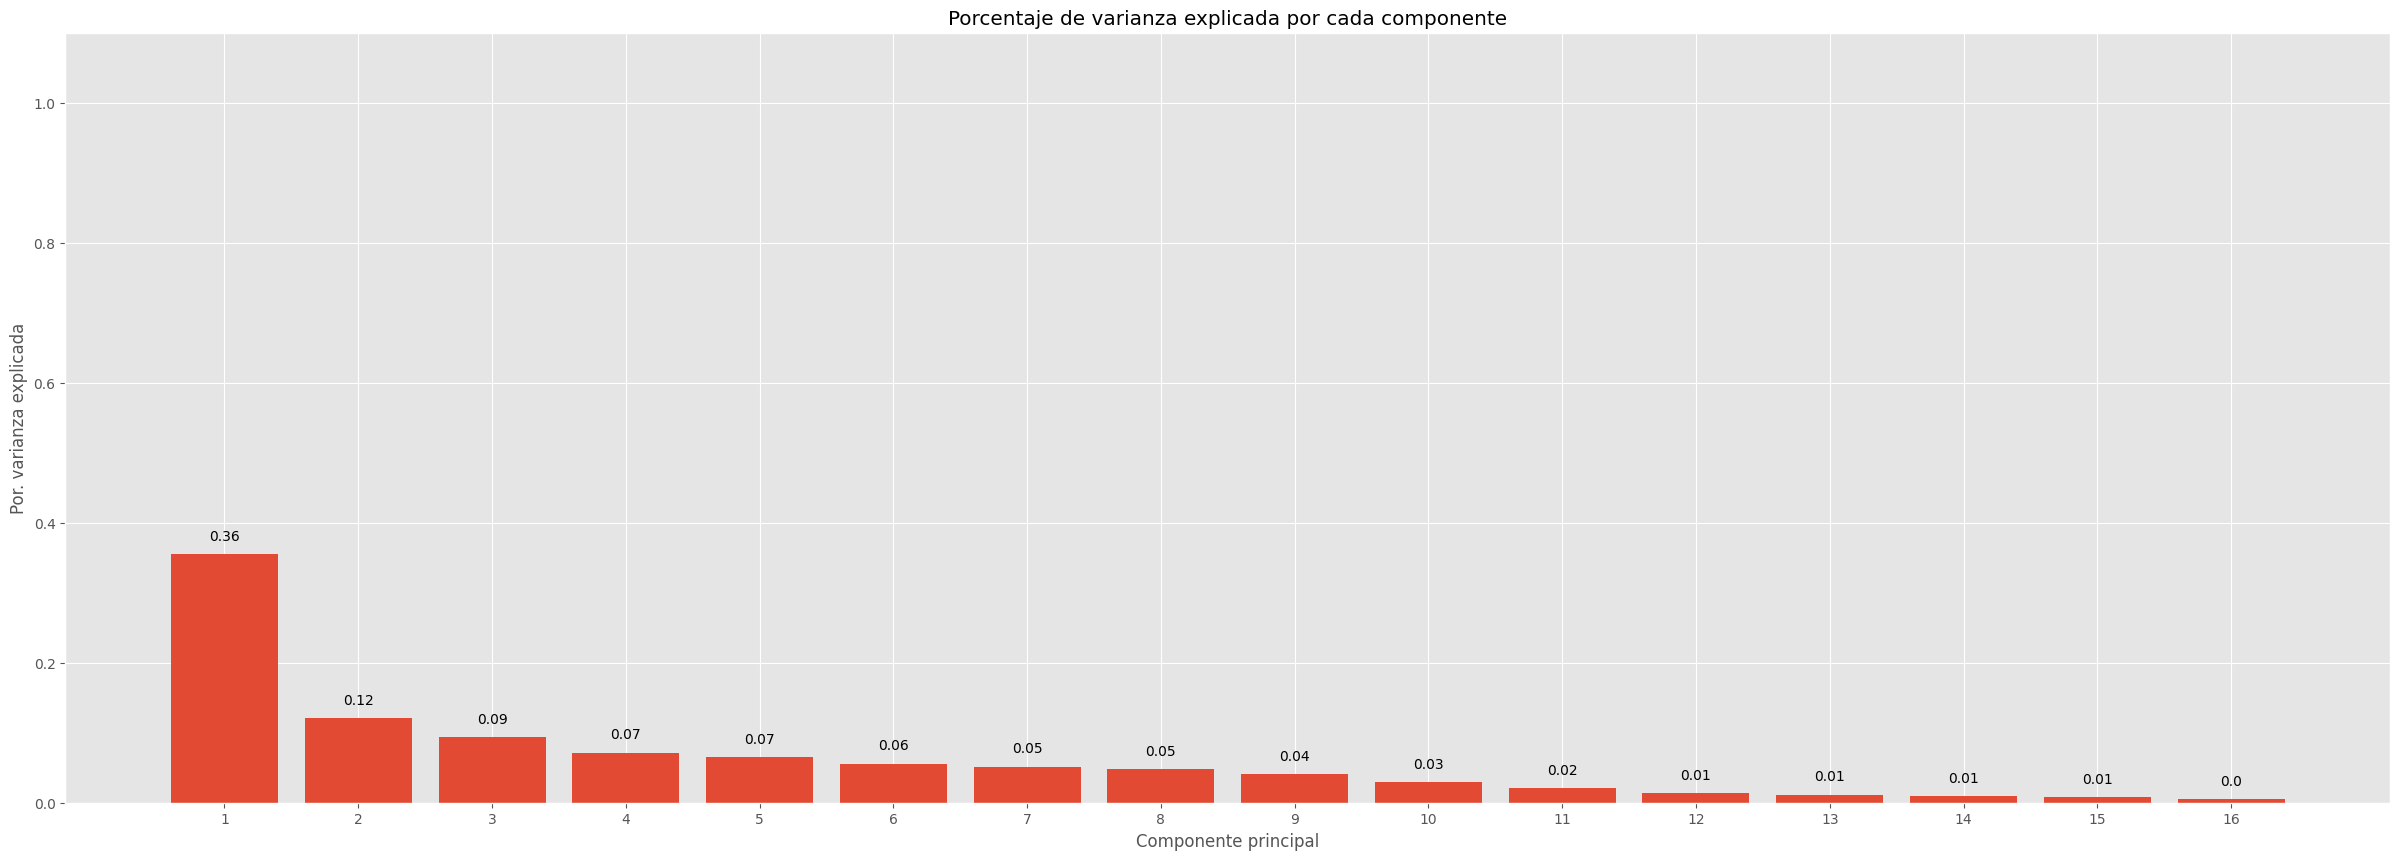

In [165]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 10))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df_copy.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.35543443 0.47636927 0.57018795 0.64162047 0.70687063 0.76283916
 0.8142436  0.86189047 0.90221666 0.93152859 0.95285194 0.96607639
 0.97774421 0.98740836 0.99511241 1.        ]


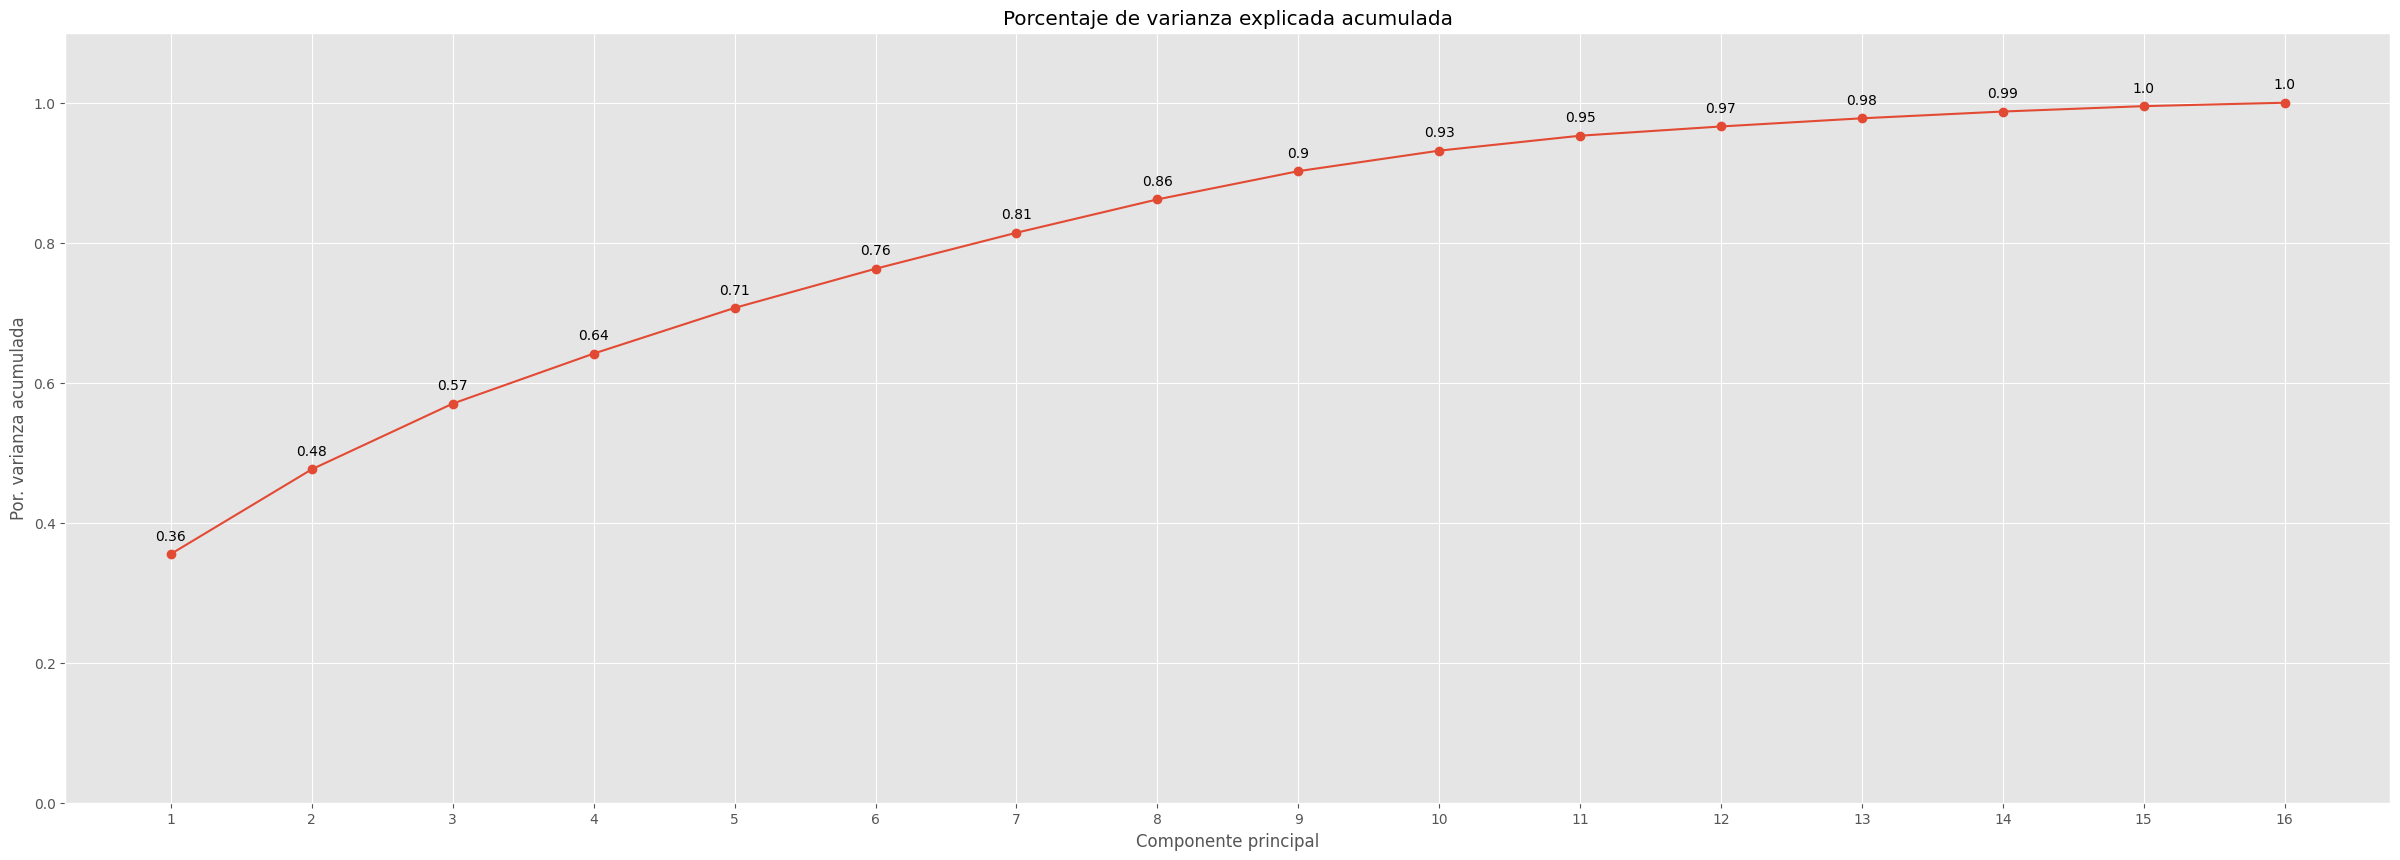

In [166]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 10))
ax.plot(
    np.arange(len(df_copy.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df_copy.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [167]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=df_copy)
cols = []
for i in range(1,17):
  cols.append('PC'+str(i))
proyecciones_new = pd.DataFrame(
    proyecciones,
    columns = cols,
    index   = df_copy.index
)
proyecciones_new.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,0.220900,-0.527099,0.481169,-1.800995,0.087017,0.140753,-0.221110,-0.094539,0.210951,0.320269,0.146859,0.206817,0.230437,-0.111138,-0.418649,0.186407
1,0.203136,0.836130,0.163353,-0.472876,0.720429,0.466584,0.038102,-0.670119,0.434923,0.634572,-0.904284,-0.162263,-0.024423,-0.364728,-0.130901,-0.028433
2,0.159663,-0.401702,-0.207776,-1.037943,-0.104415,0.557089,-0.390098,0.320274,0.176069,0.424976,-0.140400,-0.125567,-0.117666,0.652079,0.242728,0.229563
3,-0.387110,-0.788987,-0.662374,-0.878745,0.041151,1.024204,-0.190655,0.850314,-0.927828,-1.412532,0.472496,0.479846,-0.276264,-0.673686,0.673332,0.220658
4,2.981035,-1.157082,0.086682,-1.605142,-0.112085,1.014645,0.322292,0.289175,-0.363485,-0.751344,-0.188555,0.189219,0.080578,-0.076210,-0.059566,0.254949


In [168]:
# Recostruccion de las proyecciones
# ==============================================================================
recostruccion = pca_pipe.inverse_transform(proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = df_copy.columns,
                    index   = df_copy.index
)
print('------------------')
print('Valores originales')
print('------------------')
display(df_copy.head())


print('---------------------')
print('Valores reconstruidos')
print('---------------------')
display(recostruccion.head())

------------------
Valores originales
------------------


,LotFrontage,LotArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,OpenPorchSF,SalePrice
0,65.0,8450,706,150,856,856,1710,2,3,1,8,1,2,548,61,208500
1,80.0,9600,978,284,1262,1262,1262,2,3,1,6,1,2,460,27,181500
2,68.0,11250,486,434,920,920,1786,2,3,1,6,1,2,608,42,223500
3,60.0,9550,216,540,756,961,1717,1,3,1,7,1,3,642,35,140000
4,84.0,14260,655,490,1145,1145,2198,2,4,1,9,1,3,836,84,250000


---------------------
Valores reconstruidos
---------------------


,LotFrontage,LotArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,OpenPorchSF,SalePrice
0,65.0,8450.0,706.0,150.0,856.0,856.0,1710.0,2.0,3.0,1.0,8.0,1.0,2.0,548.0,61.0,208500.0
1,80.0,9600.0,978.0,284.0,1262.0,1262.0,1262.0,2.0,3.0,1.0,6.0,1.0,2.0,460.0,27.0,181500.0
2,68.0,11250.0,486.0,434.0,920.0,920.0,1786.0,2.0,3.0,1.0,6.0,1.0,2.0,608.0,42.0,223500.0
3,60.0,9550.0,216.0,540.0,756.0,961.0,1717.0,1.0,3.0,1.0,7.0,1.0,3.0,642.0,35.0,140000.0
4,84.0,14260.0,655.0,490.0,1145.0,1145.0,2198.0,2.0,4.0,1.0,9.0,1.0,3.0,836.0,84.0,250000.0


# **Aplicación de PCR**



In [169]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = df_copy2.select_dtypes(include=['float64', 'int']) \
              .corr(method='pearson')
display(tidy_corr_matrix(corr_matrix))



,variable_1,variable_2,r,abs_r
69,TotalBsmtSF,1stFlrSF,0.881011,0.881011
84,1stFlrSF,TotalBsmtSF,0.881011,0.881011
205,GarageCars,GarageArea,0.831217,0.831217
220,GarageArea,GarageCars,0.831217,0.831217
106,GrLivArea,TotRmsAbvGrd,0.820919,0.820919
...,...,...,...,...
49,BsmtUnfSF,LotArea,-0.019228,0.019228
185,Fireplaces,KitchenAbvGr,-0.007901,0.007901
155,KitchenAbvGr,Fireplaces,-0.007901,0.007901
9,LotFrontage,KitchenAbvGr,-0.003404,0.003404


In [170]:
# # (correlación absoluta > 0.8), lo que supone un problema a la hora de emplear modelos de regresión lineal

# División de los datos en train y test
# ==============================================================================
X = df_copy2.drop(columns='SalePrice')
y = df_copy2['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

Se ajustan dos modelos lineales, uno con todos los predictores y otro con solo algunas de las componentes obtenidas por PCA, con el objetivo de identificar cuál de ellos es capaz de predecir mejor el precio de venta.

In [171]:
# Creación y entrenamiento del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)


LinearRegression()

In [172]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo 
# ==============================================================================
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_ols}")


El error (rmse) de test es: 43858.67616079751


In [173]:
# Entrenamiento modelo de regresión precedido por PCA con escalado

# ==============================================================================

pipe_modelado = make_pipeline(StandardScaler(), PCA(), LinearRegression())

pipe_modelado.fit(X=X_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])

In [174]:
pipe_modelado.set_params

<bound method Pipeline.set_params of Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])>

In [175]:
# Predicciones test
# ==============================================================================
predicciones = pipe_modelado.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo 
# ==============================================================================
rmse_pcr = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_pcr}")


El error (rmse) de test es: 43858.6761607975


In [176]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'pca__n_components': [1, 2, 4, 6, 8, 10, 15, 20, 30, 50]}

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = pipe_modelado,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = KFold(n_splits=5, random_state=123,shuffle=True), 
        refit      = True,
        verbose    = 0,
        return_train_score = True,
        

       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(3)

,param_pca__n_components,mean_test_score,std_test_score,mean_train_score,std_train_score
6,15,-44929.986085,13671.054681,-39636.450862,2861.719433
5,10,-45155.771471,9552.621558,-41968.488630,2242.512804
4,8,-45472.212657,9317.715035,-42461.792935,2400.959724


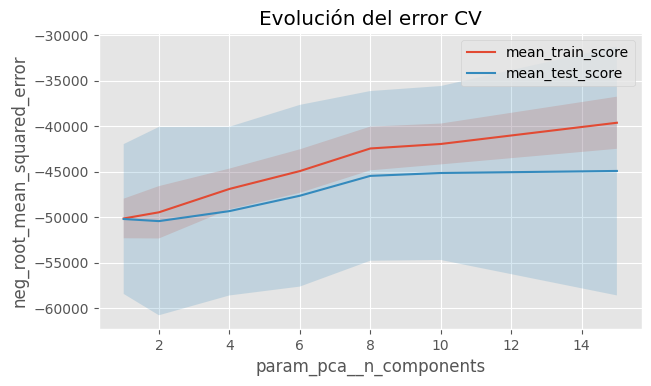

In [177]:
# Gráfico resultados validación cruzada para cada hiperparámetro
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.84), sharey=True)

resultados.plot('param_pca__n_components', 'mean_train_score', ax=ax)
resultados.plot('param_pca__n_components', 'mean_test_score', ax=ax)
ax.fill_between(resultados.param_pca__n_components.astype(np.float),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados.param_pca__n_components.astype(np.float),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel('neg_root_mean_squared_error');

In [178]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'pca__n_components': 15} : -44929.9860854237 neg_root_mean_squared_error


In [179]:
# Entrenamiento modelo de regresión precedido por PCA con escalado
# ==============================================================================
pipe_modelado = make_pipeline(StandardScaler(), PCA(n_components=5), LinearRegression())
pipe_modelado.fit(X=X_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=5)),
                ('linearregression', LinearRegression())])

In [180]:
# Predicciones test
# ==============================================================================
predicciones = pipe_modelado.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo 
# ==============================================================================
rmse_pcr = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_pcr}")


El error (rmse) de test es: 46991.37779919346
